In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Example Statsfile
**********************************************
Stats for BAM file(s): 
**********************************************
                   
                   
Total reads:       89708600
Mapped reads:      80803356	(90.0732%)
Forward strand:    48393224	(53.9449%)
Reverse strand:    41315376	(46.0551%)
Failed QC:         0	(0%)
Duplicates:        0	(0%)
Paired-end reads:  89708600	(100%)
'Proper-pairs':    74784146	(83.3634%)
Both pairs mapped: 75934258	(84.6455%)
Read 1:            44884269
Read 2:            44824331
Singletons:        4869098	(5.42768%)
	

In [2]:
columns = ["mapped reads","mapped percentage",
           "duplicates","duplicates percentage",
           "proper pairs","proper pairs percentage",
           "both pairs","both pairs percentage",
           "singletons","singletons percentage"]

In [3]:
def generate_stats_dictionary(files):    
    stats_dict = {}
    for file in files:
        with open(file,'r') as stat_file:
            for line in stat_file.readlines():
                #print(line.rstrip())
                if line.startswith("Total"):
                    total_reads = int(line.split('\t')[0].split(' ')[-1])
                if line.startswith("Mapped"):
                    mapped_percentage = float(line.split('\t')[-1].split('(')[-1].split('%')[0])
                    mapped_seqs = int(line.split('\t')[0].split(' ')[-1])
                elif line.startswith("Duplicates"):
                    duplicates = int(line.split('\t')[0].split(' ')[-1])
                    duplicates_percentage = float(line.split('\t')[-1].split('(')[-1].split('%')[0])
                elif line.startswith("'Proper-pairs'"):
                    proper_pairs = int(line.split('\t')[0].split(' ')[-1])
                    proper_pairs_percentage = float(line.split('\t')[-1].split('(')[-1].split('%')[0])
                elif line.startswith("Both"):
                    both_pairs = int(line.split('\t')[0].split(' ')[-1])
                    both_pairs_percentage = float(line.split('\t')[-1].split('(')[-1].split('%')[0])
                elif line.startswith("Singletons"):
                    singletons = int(line.split('\t')[0].split(' ')[-1])
                    singletons_percentage = float(line.split('\t')[-1].split('(')[-1].split('%')[0])
            
            keyname = file.split('/')[-1].split('.')[0].split("sorted_mapped_")[-1]
            stats_dict[keyname] = [mapped_seqs,mapped_percentage,
                                duplicates,duplicates_percentage,
                                proper_pairs,proper_pairs_percentage,
                                both_pairs,both_pairs_percentage,
                                singletons,singletons_percentage]
    return stats_dict

In [17]:
ecokd1 = !ls ../data/transcriptome/EcoKD1/stats/sorted_mapped*

In [8]:
ecokd1

['../data/transcriptome/EcoKD1/stats/sorted_mapped_I25727-L1_S17_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25728-L1_S18_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25729-L1_S19_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25730-L1_S20_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25731-L1_S21_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25732-L1_S22_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25733-L1_S23_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25734-L1_S24_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25735-L1_S25_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25736-L1_S26_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25737-L1_S27_L002.bam.stats.txt',
 '../data/transcriptome/EcoKD1/stats/sorted_mapped_I25

In [18]:
eco_dict = generate_stats_dictionary(ecokd1)

In [19]:
ecokd1_df = pd.DataFrame(eco_dict, index=columns).T

In [20]:
ecokd1_df.head()

,mapped reads,mapped percentage,duplicates,duplicates percentage,proper pairs,proper pairs percentage,both pairs,both pairs percentage,singletons,singletons percentage
I25727-L1_S17_L002,80803356.0,90.0732,0.0,0.0,74784146.0,83.3634,75934258.0,84.6455,4869098.0,5.42768
I25728-L1_S18_L002,80114809.0,90.0312,0.0,0.0,74079148.0,83.2484,75426550.0,84.7626,4688259.0,5.26856
I25729-L1_S19_L002,82111695.0,90.5602,0.0,0.0,76259538.0,84.1059,77370802.0,85.3315,4740893.0,5.22868
I25730-L1_S20_L002,76353707.0,90.6196,0.0,0.0,70904526.0,84.1523,71949620.0,85.3927,4404087.0,5.22695
I25731-L1_S21_L002,82109876.0,90.4652,0.0,0.0,76497022.0,84.2812,77645094.0,85.5461,4464782.0,4.91911


In [12]:
fontsize=15

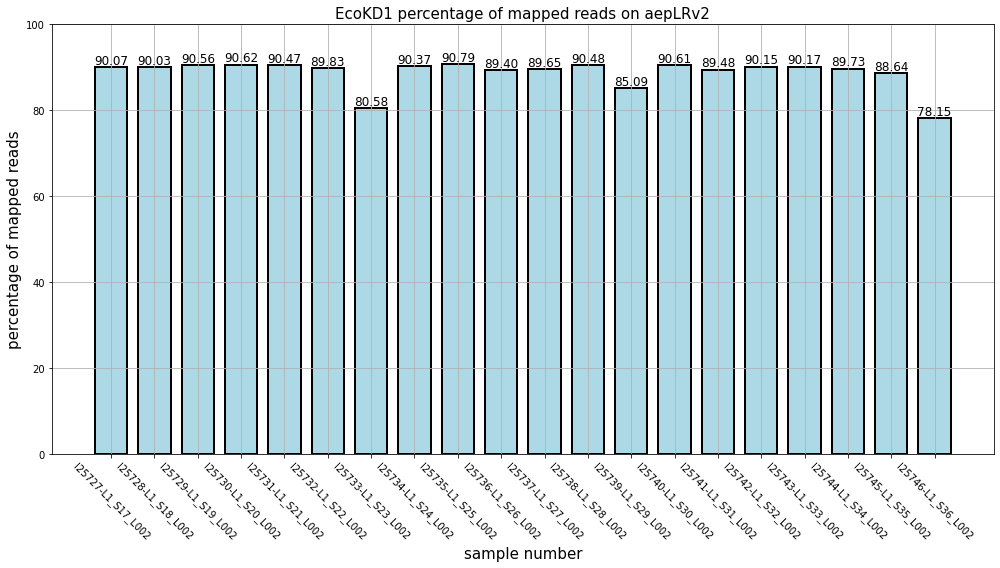

In [13]:
xticks = range(0,len(ecokd1_df)*2,2)
fig = plt.figure(figsize=(14,8))

bar = plt.bar(x=xticks, height=ecokd1_df['mapped percentage'],color='lightblue',edgecolor='black',linewidth=2, width=1.5)
plt.ylim(0,100)
plt.xticks(ticks=xticks,labels=ecokd1_df.index, rotation=-45)
plt.xlabel("sample number", fontsize=fontsize)
plt.ylabel("percentage of mapped reads",fontsize=fontsize)
plt.title("EcoKD1 percentage of mapped reads on aepLRv2", fontsize=fontsize)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.grid()
plt.tight_layout()

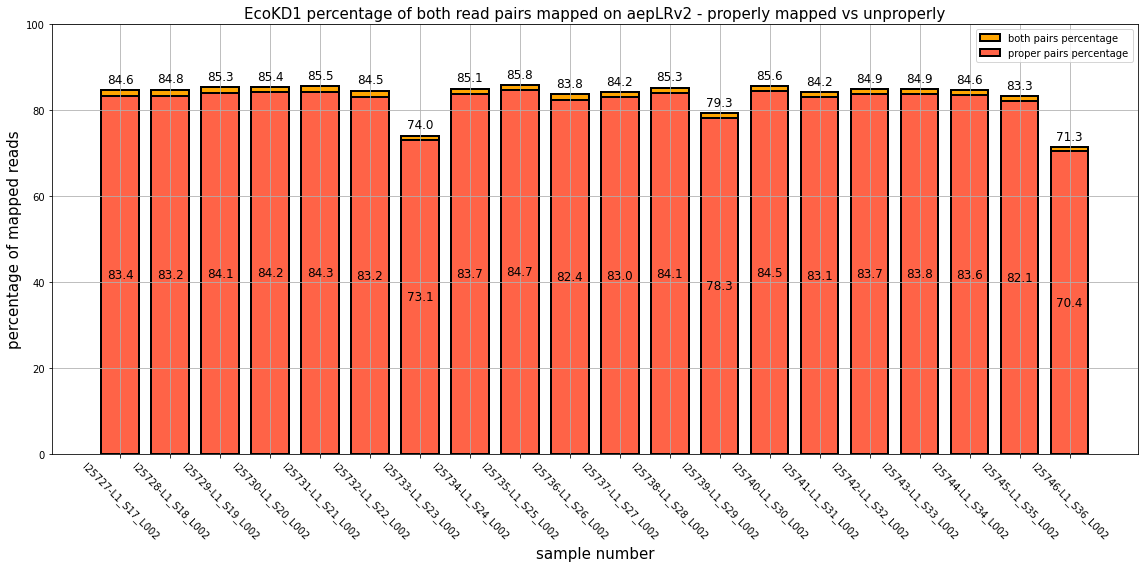

In [14]:
xticks = range(0,len(ecokd1_df)*2,2)
fig = plt.figure(figsize=(16,8))
bar1 = plt.bar(x=xticks,height=ecokd1_df['both pairs percentage'],color='orange',edgecolor='black',linewidth=2, width=1.5,label='both pairs percentage')
bar2 = plt.bar(x=xticks,height=ecokd1_df['proper pairs percentage'],color='tomato',edgecolor='black',linewidth=2, width=1.5,label='proper pairs percentage')
#bar3 = plt.bar(x=xticks,height=ecokd1_df['singletons percentage'],color='yellow',edgecolor='black',linewidth=2, width=1.5,)

plt.ylim(0,100)
plt.xticks(ticks=xticks,labels=ecokd1_df.index, rotation=-45)
plt.xlabel("sample number", fontsize=fontsize)
plt.ylabel("percentage of mapped reads",fontsize=fontsize)
plt.title("EcoKD1 percentage of both read pairs mapped on aepLRv2 - properly mapped vs unproperly", fontsize=fontsize)

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=12)
    
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height/2, f'{height:.1f}', ha='center', va='center', fontsize=12)

plt.legend()
plt.grid()
plt.tight_layout()

In [24]:
def plot_statistics(ecokd1_df, fontsize=15, width=14, height=8, rotation=-45, titel='figure title',textsize=12):
    xticks = range(0,len(ecokd1_df)*2,2)
    fig = plt.figure(figsize=(width,height))

    full = [100] * len(ecokd1_df)
    non_proper = ecokd1_df['both pairs percentage']-ecokd1_df['proper pairs percentage']
    singletons_plus_non_proper = ecokd1_df['singletons percentage']+(ecokd1_df['both pairs percentage']-ecokd1_df['proper pairs percentage'])
    both_pairs_singletons =  ecokd1_df['both pairs percentage'] + ecokd1_df['singletons percentage']
    bar0 = plt.bar(x=xticks,height=full,color='grey',edgecolor='black',linewidth=2, width=1.5,label='not mapped')

    bar1 = plt.bar(x=xticks,height=both_pairs_singletons,color='tomato',edgecolor='black',linewidth=2, width=1.5,label='proper pairs')
    bar2 = plt.bar(x=xticks,height=singletons_plus_non_proper,color='yellow',edgecolor='black',linewidth=2, width=1.5,label='singletons')
    bar3 = plt.bar(x=xticks,height=ecokd1_df['both pairs percentage']-ecokd1_df['proper pairs percentage'],color='orange',edgecolor='black',linewidth=2, width=1.5, label='no proper pairs')

    plt.ylim(0,110)
    plt.xticks(ticks=xticks,labels=ecokd1_df.index, rotation=rotation, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlabel("sample number", fontsize=fontsize)
    plt.ylabel("percentage of mapped reads [%]",fontsize=fontsize)
    plt.title(titel, fontsize=fontsize)

    for index,rect in enumerate(bar1):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height / 2, f'{height:.1f}', ha='center', va='bottom', fontsize=textsize)
        txt = ecokd1_df['both pairs percentage'][index]
        plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1, f'{txt:.1f}', ha='center', va='bottom', fontsize=textsize)


    for index,rect in enumerate(bar2):
        height = rect.get_height()
        txt = height - non_proper[index]
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{txt:.1f}', ha='center', va='bottom', fontsize=textsize)

    for rect in bar3:
        height = rect.get_height()

        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.1f}', ha='center', va='bottom', fontsize=textsize)


    plt.legend(ncol = 4, loc='upper center', fontsize=fontsize)
    #plt.grid()
    plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
    plt.rcParams['axes.titlepad'] = 20  # pad is in points...
    plt.tight_layout()
    return fig

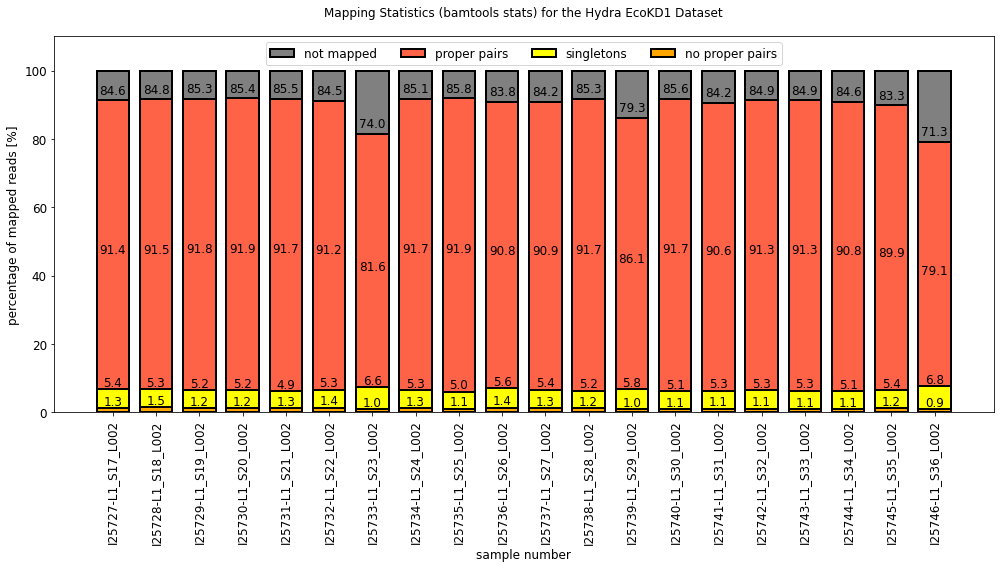

In [23]:
fig = plot_statistics(ecokd1_df,fontsize=12, rotation=90,titel="Mapping Statistics (bamtools stats) for the Hydra EcoKD1 Dataset")
#plt.savefig("../data/transcriptome/hydraEcoKD1_mapping_statistics_horizontal.png",dpi=300)

In [17]:
temp_files = !ls ../data/transcriptome/HydraTemperature/stats/sorted_mapped*
ahl_files = !ls ../data/transcriptome/HydraAHL/stats/sorted_mapped*
recon_files = !ls ../data/transcriptome/HydraRecolonization/stats/sorted_mapped*

In [18]:
hydraTemp = generate_stats_dictionary(temp_files)
hydraAHL = generate_stats_dictionary(ahl_files)
hydraRecon = generate_stats_dictionary(recon_files)

In [19]:
hydratemp_df = pd.DataFrame(hydraTemp, index=columns).T
hydraahl_df = pd.DataFrame(hydraAHL, index=columns).T
hydrarecon_df = pd.DataFrame(hydraRecon, index=columns).T

In [5]:
curvibacter_files = !ls ../data/transcriptome/curvibacter/*.stats
curviData = generate_stats_dictionary(curvibacter_files)
curvi_df = pd.DataFrame(curviData, index=columns).T

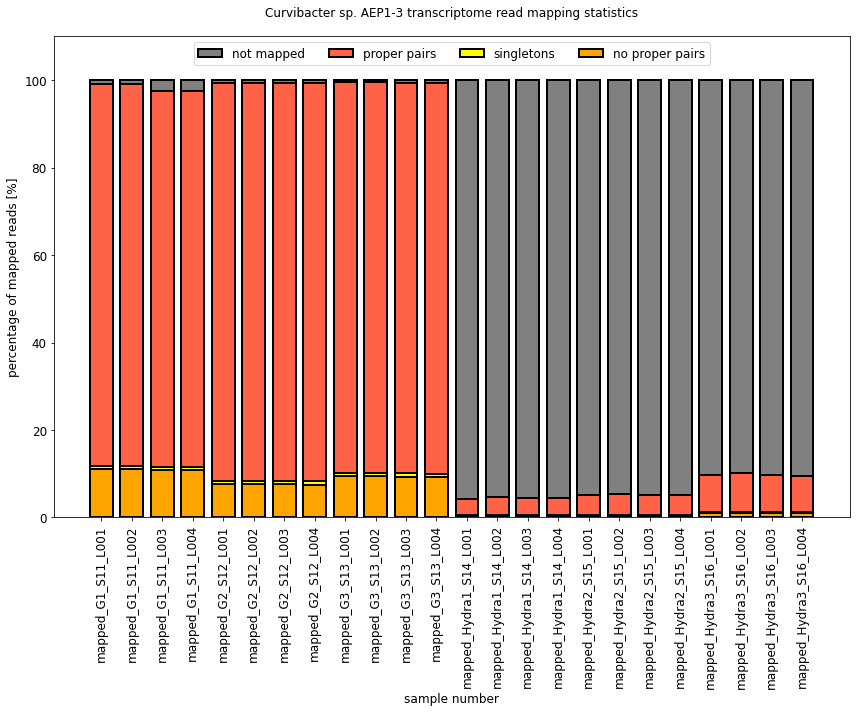

In [33]:
width = 12
height = 10
rotation = 90
fontsize=12
textsize=12
titel = "Curvibacter sp. AEP1-3 transcriptome read mapping statistics"
xticks = range(0,len(curvi_df)*2,2)
fig = plt.figure(figsize=(width,height))

full = [100] * len(curvi_df)
non_proper = curvi_df['both pairs percentage']-curvi_df['proper pairs percentage']
singletons_plus_non_proper = curvi_df['singletons percentage']+(curvi_df['both pairs percentage']-curvi_df['proper pairs percentage'])
both_pairs_singletons =  curvi_df['both pairs percentage'] + curvi_df['singletons percentage']
bar0 = plt.bar(x=xticks,height=full,color='grey',edgecolor='black',linewidth=2, width=1.5,label='not mapped')

bar1 = plt.bar(x=xticks,height=both_pairs_singletons,color='tomato',edgecolor='black',linewidth=2, width=1.5,label='proper pairs')
bar2 = plt.bar(x=xticks,height=singletons_plus_non_proper,color='yellow',edgecolor='black',linewidth=2, width=1.5,label='singletons')
bar3 = plt.bar(x=xticks,height=curvi_df['both pairs percentage']-curvi_df['proper pairs percentage'],color='orange',edgecolor='black',linewidth=2, width=1.5, label='no proper pairs')

plt.ylim(0,110)
plt.xticks(ticks=xticks,labels=curvi_df.index, rotation=rotation, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("sample number", fontsize=fontsize)
plt.ylabel("percentage of mapped reads [%]",fontsize=fontsize)
plt.title(titel, fontsize=fontsize)
plt.legend(ncol = 4, loc='upper center', fontsize=fontsize)
#plt.grid()
plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 20  # pad is in points...
plt.tight_layout()
plt.savefig("../data/transcriptome/curvibacter/curvibacter_mapping_stringent_final.png",dpi=300)

In [37]:
curvibacter_files = !ls ../data/transcriptome/curvibacter/stringent_trimmed_files/sorted_mapped/*.stats
curviData = generate_stats_dictionary(curvibacter_files)
curvi_df = pd.DataFrame(curviData, index=columns).T

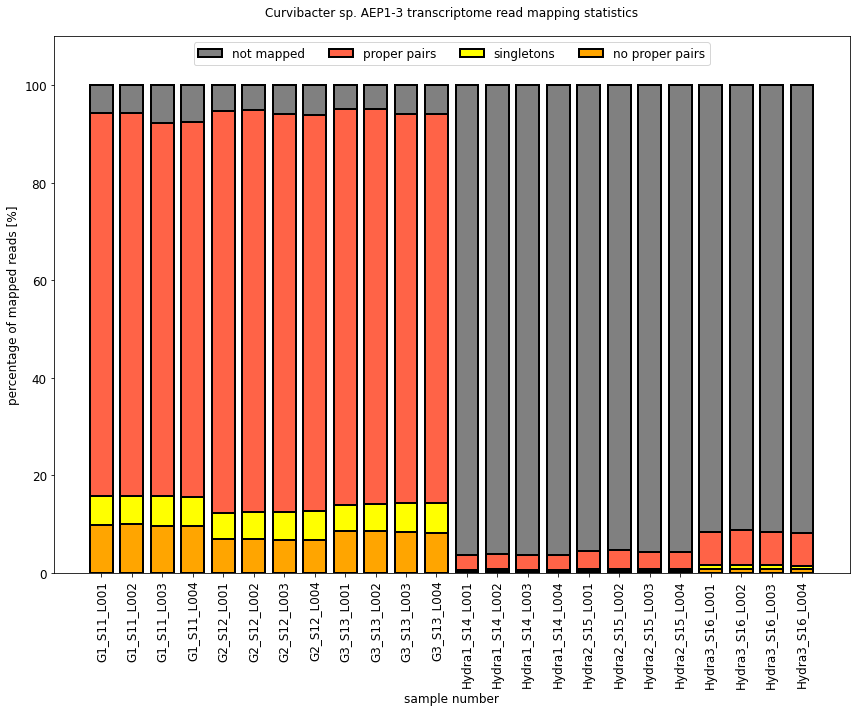

In [39]:
width = 12
height = 10
rotation = 90
fontsize=12
textsize=12
titel = "Curvibacter sp. AEP1-3 transcriptome read mapping statistics"
xticks = range(0,len(curvi_df)*2,2)
fig = plt.figure(figsize=(width,height))

full = [100] * len(curvi_df)
non_proper = curvi_df['both pairs percentage']-curvi_df['proper pairs percentage']
singletons_plus_non_proper = curvi_df['singletons percentage']+(curvi_df['both pairs percentage']-curvi_df['proper pairs percentage'])
both_pairs_singletons =  curvi_df['both pairs percentage'] + curvi_df['singletons percentage']
bar0 = plt.bar(x=xticks,height=full,color='grey',edgecolor='black',linewidth=2, width=1.5,label='not mapped')

bar1 = plt.bar(x=xticks,height=both_pairs_singletons,color='tomato',edgecolor='black',linewidth=2, width=1.5,label='proper pairs')
bar2 = plt.bar(x=xticks,height=singletons_plus_non_proper,color='yellow',edgecolor='black',linewidth=2, width=1.5,label='singletons')
bar3 = plt.bar(x=xticks,height=curvi_df['both pairs percentage']-curvi_df['proper pairs percentage'],color='orange',edgecolor='black',linewidth=2, width=1.5, label='no proper pairs')

plt.ylim(0,110)
plt.xticks(ticks=xticks,labels=curvi_df.index, rotation=rotation, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("sample number", fontsize=fontsize)
plt.ylabel("percentage of mapped reads [%]",fontsize=fontsize)
plt.title(titel, fontsize=fontsize)
plt.legend(ncol = 4, loc='upper center', fontsize=fontsize)
#plt.grid()
plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 20  # pad is in points...
plt.tight_layout()
plt.savefig("../data/transcriptome/curvibacter/stringent_trimmed_files/sorted_mapped/curvibacter_sorted_mapping_stringent.png",dpi=300)

In [40]:
curvibacter_files = !ls ../data/transcriptome/curvibacter/trimmed_files/*.stats
curviData = generate_stats_dictionary(curvibacter_files)
curvi_df = pd.DataFrame(curviData, index=columns).T

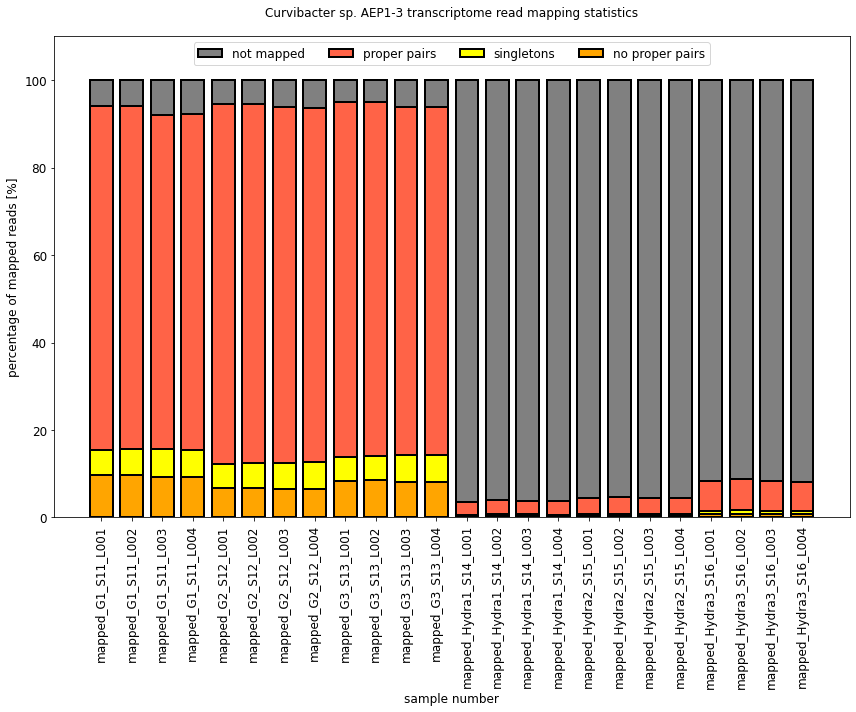

In [41]:
width = 12
height = 10
rotation = 90
fontsize=12
textsize=12
titel = "Curvibacter sp. AEP1-3 transcriptome read mapping statistics"
xticks = range(0,len(curvi_df)*2,2)
fig = plt.figure(figsize=(width,height))

full = [100] * len(curvi_df)
non_proper = curvi_df['both pairs percentage']-curvi_df['proper pairs percentage']
singletons_plus_non_proper = curvi_df['singletons percentage']+(curvi_df['both pairs percentage']-curvi_df['proper pairs percentage'])
both_pairs_singletons =  curvi_df['both pairs percentage'] + curvi_df['singletons percentage']
bar0 = plt.bar(x=xticks,height=full,color='grey',edgecolor='black',linewidth=2, width=1.5,label='not mapped')

bar1 = plt.bar(x=xticks,height=both_pairs_singletons,color='tomato',edgecolor='black',linewidth=2, width=1.5,label='proper pairs')
bar2 = plt.bar(x=xticks,height=singletons_plus_non_proper,color='yellow',edgecolor='black',linewidth=2, width=1.5,label='singletons')
bar3 = plt.bar(x=xticks,height=curvi_df['both pairs percentage']-curvi_df['proper pairs percentage'],color='orange',edgecolor='black',linewidth=2, width=1.5, label='no proper pairs')

plt.ylim(0,110)
plt.xticks(ticks=xticks,labels=curvi_df.index, rotation=rotation, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("sample number", fontsize=fontsize)
plt.ylabel("percentage of mapped reads [%]",fontsize=fontsize)
plt.title(titel, fontsize=fontsize)
plt.legend(ncol = 4, loc='upper center', fontsize=fontsize)
#plt.grid()
plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 20  # pad is in points...
plt.tight_layout()
plt.savefig("../data/transcriptome/curvibacter/trimmed_files/curvibacter_mapping.png",dpi=300)

In [20]:
#hydratemp_fig = plot_statistics(hydratemp_df, fontsize=40, width=50, height=30, rotation=90, textsize=20, titel="Mapping Statistics (bamtools stats) for the Hydra Temperature Dataset")
#plt.savefig("../data/transcriptome/hydraTemperature_mapping_statistics_horizontal.png",dpi=300)

In [21]:
#hydraahl_fig = plot_statistics(hydraahl_df, rotation=90, fontsize=12, textsize=8, width=20, titel="Mapping Statistics (bamtools stats) for the Hydra AHL Dataset")
#plt.savefig("../data/transcriptome/hydraAHL_mapping_statistics_horizontal.png",dpi=300)

In [22]:
#hydrarecon_fig = plot_statistics(hydrarecon_df, fontsize=12,rotation=90, titel="Mapping Statistics (bamtools stats) for the Hydra Recolonization Dataset")
#plt.savefig("../data/transcriptome/hydraRecolonization_mapping_statistics_horizontal.png",dpi=300)

In [25]:
def plot_statistics_barh(df, fontsize=15, width=14, height=8, rotation=-45, titel='figure title',textsize=12, text_adjust=2):
    xticks = range(0,len(df)*2,2)
    fig = plt.figure(figsize=(width,height))

    full = [100] * len(df)
    non_proper = df['both pairs percentage']-df['proper pairs percentage']
    singletons_plus_non_proper = df['singletons percentage']+(df['both pairs percentage']-df['proper pairs percentage'])
    both_pairs_singletons =  df['both pairs percentage'] + df['singletons percentage']
    
    bar0 = plt.barh(y=xticks,width=full,color='grey',edgecolor='black',linewidth=2, height=1.5,label='not mapped')
    bar1 = plt.barh(y=xticks,width=both_pairs_singletons,color='tomato',edgecolor='black',linewidth=2, height=1.5,label='proper pairs')
    bar2 = plt.barh(y=xticks,width=singletons_plus_non_proper,color='yellow',edgecolor='black',linewidth=2, height=1.5,label='singletons')
    bar3 = plt.barh(y=xticks,width=non_proper,color='orange',edgecolor='black',linewidth=2, height=1.5, label='no proper pairs')

    plt.xlim(0,100)
    plt.ylim(-2,len(df)*2+3)
    plt.yticks(ticks=xticks,labels=df.index, fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.ylabel("sample number", fontsize=fontsize)
    plt.xlabel("percentage of mapped reads [%]",fontsize=fontsize)
    plt.title(titel, fontsize=fontsize)

    for index,rect in enumerate(bar1):
        width = rect.get_width()
        not_mapped_percentage = 100 - width
        plt.text(width/2.0, rect.get_y() + 0.5, f'{width:.1f}',ha='center', fontsize=textsize)
        txt = df['both pairs percentage'][index]
        plt.text(width + text_adjust, rect.get_y() + 0.5, f'{txt:.1f}', ha='center', fontsize=textsize)
        plt.text(width + (not_mapped_percentage / 2), rect.get_y() + 0.5, f'{not_mapped_percentage:.1f}', ha='center', fontsize=textsize)

    for index,rect in enumerate(bar2):
        width = rect.get_width()
        txt = width - non_proper[index]
        plt.text(width + text_adjust, rect.get_y()+ 0.5, f'{txt:.1f}', ha='center', fontsize=textsize)

    for rect in bar3:
        width = rect.get_width()

        plt.text(width + text_adjust, rect.get_y()+ 0.5, f'{width:.1f}', ha='center', fontsize=textsize)


  
    plt.legend(ncol = 4, loc='upper center', fontsize=fontsize)
    #plt.grid()
    plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
    plt.rcParams['axes.titlepad'] = 20  # pad is in points...
    plt.tight_layout()
    return fig

In [24]:
#hydraTemp_fig = plot_statistics_barh(hydratemp_df, width=20, height=40, fontsize=20, textsize=20, titel="Mapping Statistics (bamtools stats) for the Hydra Temperature Dataset")
#plt.savefig("../data/transcriptome/hydraTemperature_mapping_statistics.png",dpi=300)

In [25]:
#hydraTemp_fig_2 = plot_statistics_barh(hydratemp_df[25:50],width=14, height=15,textsize=10, titel="Mapping Statistics (bamtools stats) for the Hydra Temperature Dataset", text_adjust=1.5)
#plt.savefig("../data/transcriptome/hydraTemperature_mapping_statistics_2.png",dpi=300)

In [26]:
#hydraTemp_fig_1 = plot_statistics_barh(hydratemp_df[0:25],width=14, height=15,textsize=10, titel="Mapping Statistics (bamtools stats) for the Hydra Temperature Dataset", text_adjust=1.5)
#plt.savefig("../data/transcriptome/hydraTemperature_mapping_statistics_1.png",dpi=300)

In [27]:
ecokd1_df.describe()

,mapped reads,mapped percentage,duplicates,duplicates percentage,proper pairs,proper pairs percentage,both pairs,both pairs percentage,singletons,singletons percentage
count,2.000000e+01,20.000000,20.0,20.0,2.000000e+01,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000
mean,7.745849e+07,88.744130,0.0,0.0,7.169224e+07,82.129215,7.272679e+07,83.322740,4.731693e+06,5.421380
std,9.331687e+06,3.454345,0.0,0.0,8.918723e+06,3.825840,8.998375e+06,3.911042,6.911267e+05,0.473387
min,5.920021e+07,78.150800,0.0,0.0,5.484641e+07,70.415100,5.572071e+07,71.342900,3.479503e+06,4.919110
25%,7.314652e+07,89.461475,0.0,0.0,6.737490e+07,82.825925,6.842035e+07,84.072025,4.463858e+06,5.225598
50%,7.792325e+07,90.052200,0.0,0.0,7.238980e+07,83.457400,7.339234e+07,84.704050,4.563378e+06,5.290860
75%,8.211033e+07,90.468325,0.0,0.0,7.631891e+07,84.086625,7.743938e+07,85.274950,4.930141e+06,5.416168
max,9.412001e+07,90.787100,0.0,0.0,8.774347e+07,84.674800,8.887409e+07,85.805100,6.662624e+06,6.807950


In [30]:
hydraahl_df.describe()

,mapped reads,mapped percentage,duplicates,duplicates percentage,proper pairs,proper pairs percentage,both pairs,both pairs percentage,singletons,singletons percentage
count,4.400000e+01,44.000000,44.0,44.0,4.400000e+01,44.000000,4.400000e+01,44.000000,4.400000e+01,44.000000
mean,2.431998e+07,92.294516,0.0,0.0,2.276700e+07,86.410584,2.309245e+07,87.647823,1.227526e+06,4.646689
std,3.509287e+06,0.606108,0.0,0.0,3.273064e+06,0.850526,3.317660e+06,0.868301,2.099555e+05,0.286073
min,1.093062e+07,90.920400,0.0,0.0,1.024404e+07,84.872700,1.039647e+07,85.980900,5.322140e+05,4.257110
25%,2.336360e+07,91.808750,0.0,0.0,2.188614e+07,85.655400,2.221414e+07,86.870400,1.154727e+06,4.417283
50%,2.474012e+07,92.500200,0.0,0.0,2.316614e+07,86.619850,2.349096e+07,87.928150,1.236962e+06,4.589200
75%,2.596746e+07,92.808525,0.0,0.0,2.440680e+07,87.134625,2.473665e+07,88.418400,1.358977e+06,4.927733
max,2.988558e+07,93.012700,0.0,0.0,2.780299e+07,87.479800,2.822907e+07,88.711200,1.657236e+06,5.197510


In [31]:
hydratemp_df.describe()

,mapped reads,mapped percentage,duplicates,duplicates percentage,proper pairs,proper pairs percentage,both pairs,both pairs percentage,singletons,singletons percentage
count,5.000000e+01,50.000000,50.0,50.0,5.000000e+01,50.000000,5.000000e+01,50.000000,5.000000e+01,50.000000
mean,2.386938e+07,71.218996,0.0,0.0,2.255239e+07,67.278394,2.265740e+07,67.592682,1.211976e+06,3.626315
std,6.023665e+06,7.134672,0.0,0.0,5.760239e+06,7.123816,5.786129e+06,7.171461,2.985205e+05,0.437789
min,5.982131e+06,39.736800,0.0,0.0,5.679947e+06,36.329000,5.704701e+06,36.424900,2.774300e+05,2.803750
25%,1.987268e+07,70.221025,0.0,0.0,1.874317e+07,65.783150,1.882424e+07,66.048100,9.619198e+05,3.368980
50%,2.411809e+07,72.039750,0.0,0.0,2.265742e+07,68.112300,2.280202e+07,68.387550,1.206096e+06,3.606755
75%,2.718229e+07,75.052825,0.0,0.0,2.561984e+07,71.360925,2.575191e+07,71.693950,1.414322e+06,3.888985
max,3.670348e+07,79.515700,0.0,0.0,3.478574e+07,75.927000,3.495209e+07,76.409400,1.915614e+06,4.853830


In [32]:
hydrarecon_df.describe()

,mapped reads,mapped percentage,duplicates,duplicates percentage,proper pairs,proper pairs percentage,both pairs,both pairs percentage,singletons,singletons percentage
count,1.900000e+01,19.000000,19.0,19.0,1.900000e+01,19.000000,1.900000e+01,19.000000,1.900000e+01,19.000000
mean,4.605467e+07,92.205774,0.0,0.0,4.302661e+07,86.142984,4.363973e+07,87.388063,2.414934e+06,4.817701
std,9.458942e+06,0.586505,0.0,0.0,8.842054e+06,0.659633,8.937304e+06,0.729906,5.284998e+05,0.182305
min,2.068587e+07,90.232000,0.0,0.0,1.927448e+07,84.130700,1.960322e+07,85.196400,1.082657e+06,4.227940
25%,4.351409e+07,91.978300,0.0,0.0,4.061345e+07,85.933300,4.115491e+07,87.103150,2.359182e+06,4.779690
50%,4.771151e+07,92.206100,0.0,0.0,4.466438e+07,86.163000,4.530833e+07,87.334000,2.567169e+06,4.830250
75%,5.282630e+07,92.512400,0.0,0.0,4.939388e+07,86.449950,5.009460e+07,87.760050,2.774854e+06,4.920465
max,5.559946e+07,93.135500,0.0,0.0,5.194569e+07,87.546500,5.264986e+07,88.907600,2.949606e+06,5.037050


In [42]:
curvibacter_files = !ls ../data/transcriptome/curvibacter/stringent_trimmed_files_final/*.stats
curviData = generate_stats_dictionary(curvibacter_files)
curvi_df = pd.DataFrame(curviData, index=columns).T

In [43]:
curvibacter_files = !ls ../data/transcriptome/curvibacter/trimmed_files/*.stats
curviData = generate_stats_dictionary(curvibacter_files)
curvi_df_normal = pd.DataFrame(curviData, index=columns).T

In [46]:
y_values = curvi_df_normal['mapped reads'] - curvi_df['mapped reads'] 

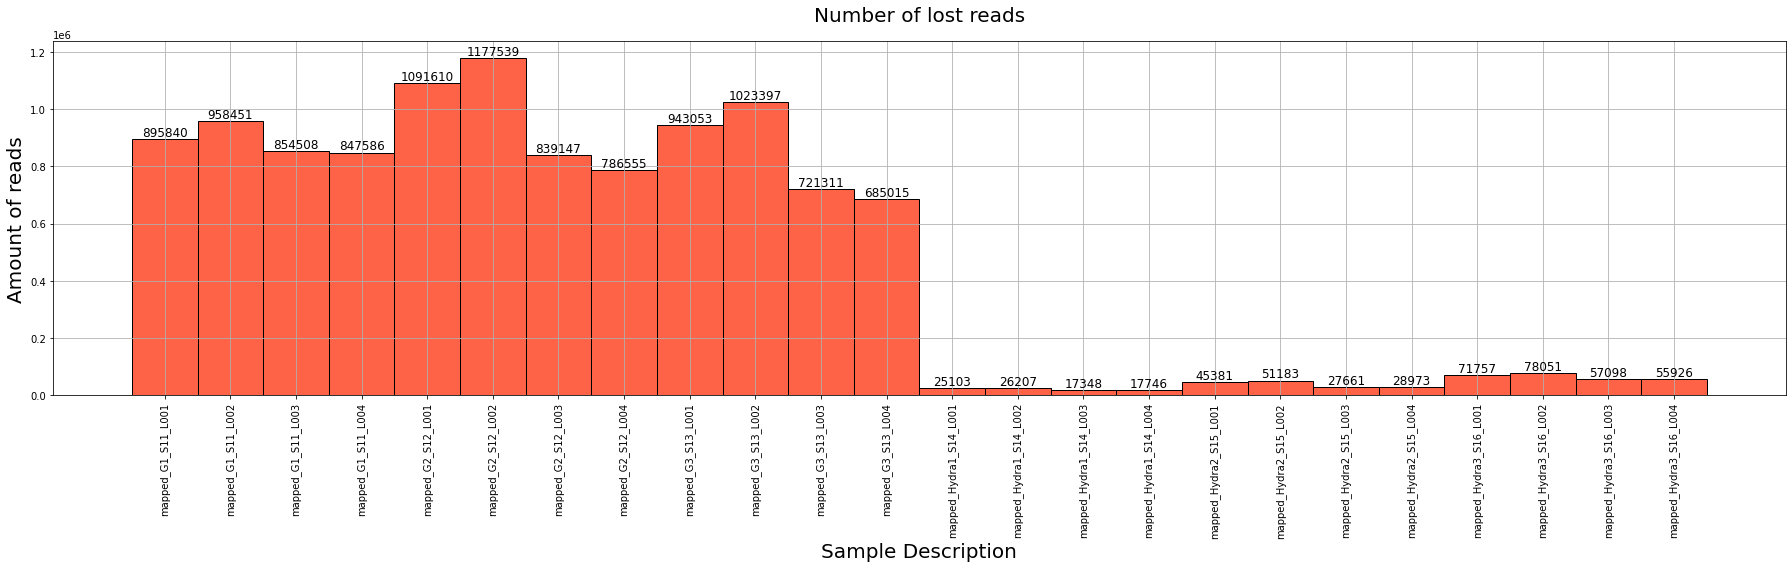

In [66]:
plt.figure(figsize=(25,8))
bar1 = plt.bar(height=y_values,x=range(len(y_values)),color='tomato',edgecolor='black',linewidth=1, width=1)
for index,rect in enumerate(bar1):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1, f'{height:.0f}', ha='center', va='bottom', fontsize=textsize)
plt.xticks(ticks=range(len(y_values)),labels=curvi_df_normal.index, rotation=90)
plt.grid()
plt.title("Number of lost reads", fontsize=20)
plt.ylabel("Amount of reads", fontsize=20)
plt.xlabel("Sample Description", fontsize=20)
plt.tight_layout()
plt.savefig("../data/transcriptome/curvibacter/number_lost_reads.png",dpi=300)